In [25]:
import json 
import os
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [26]:
df = pd.read_json("./green_bondnet_results_revamp.json")

/tmp/ipykernel_2206531/3412123171.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df = pd.read_json("./green_bondnet_results_revamp.json")
/tmp/ipykernel_2206531/3412123171.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df = pd.read_json("./green_bondnet_results_revamp.json")
/tmp/ipykernel_2206531/3412123171.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, ma

In [27]:
pred = np.array(df["full"]["pred"])
target = np.array(df["full"]["target"])
mae = np.mean(np.abs(pred - target))
rmse = np.sqrt(np.mean(np.abs(pred - target)**2))
r2 = np.corrcoef(pred, target)[1,0]**2
df_plot = pd.DataFrame.from_dict({
    "preds": pred,
    "labels": target
})

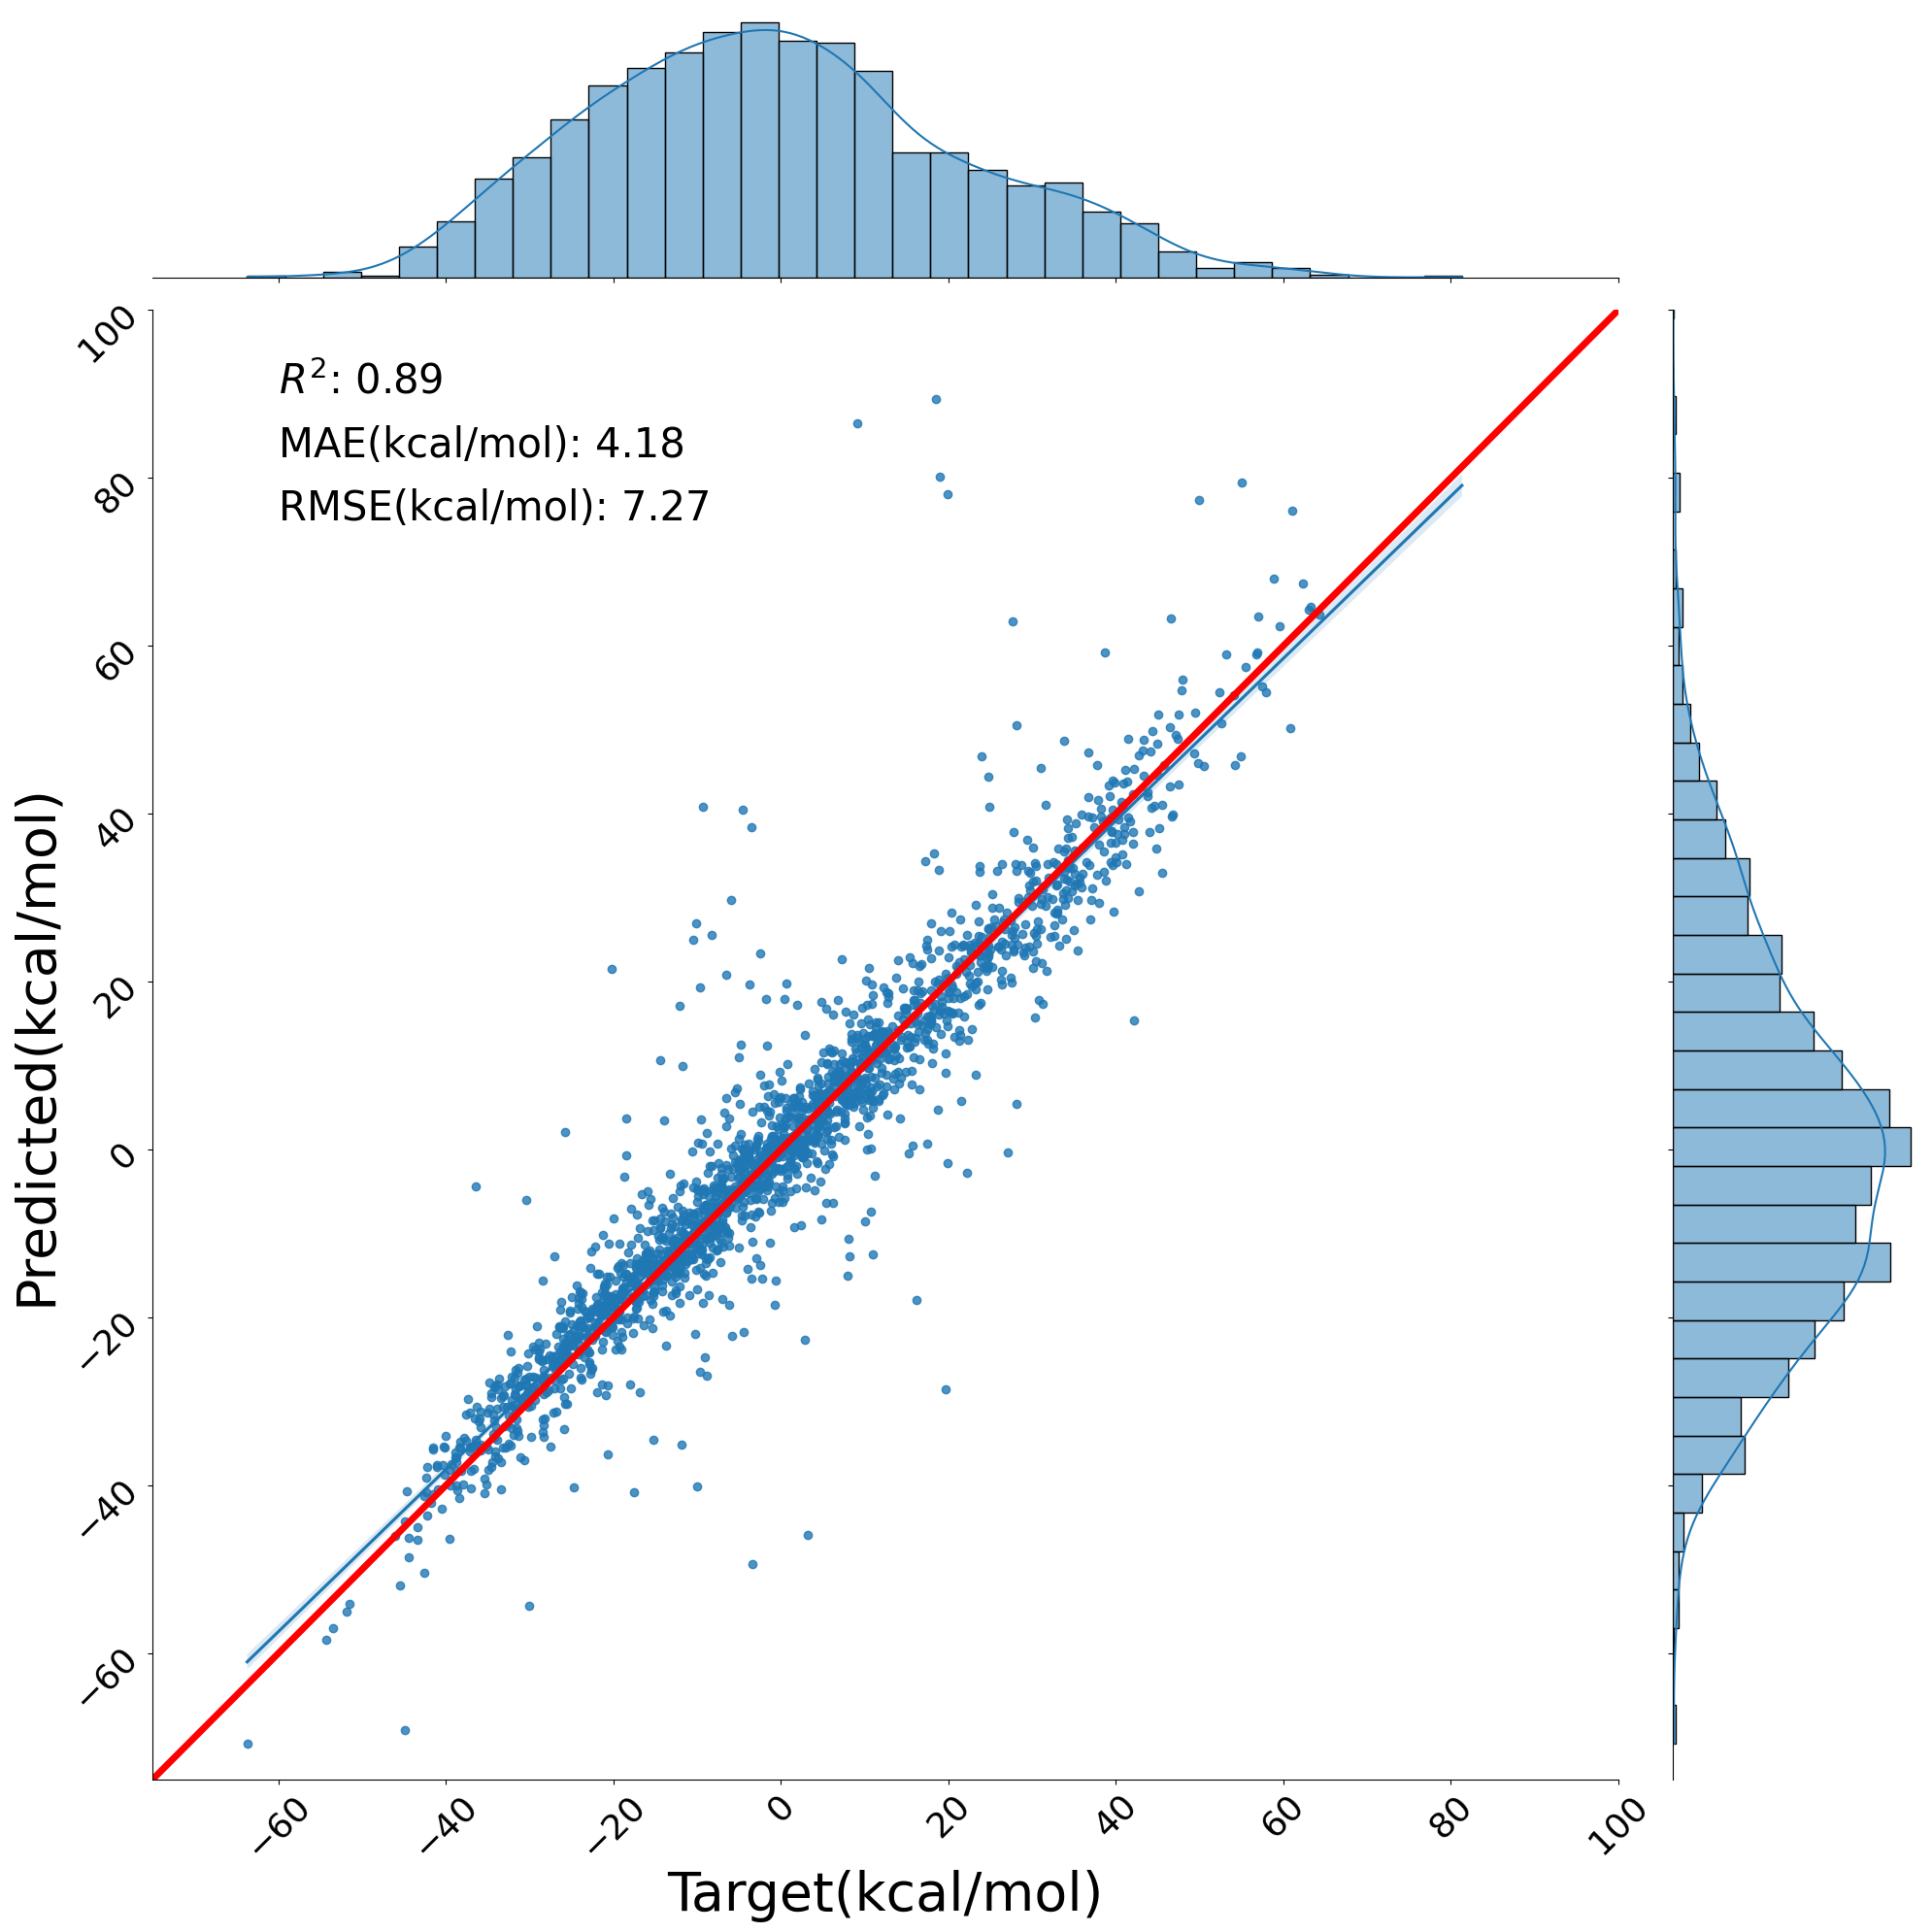

In [28]:
sns.jointplot(
    x="preds",
    y="labels",
    data=df_plot,
    kind="reg",
    height=20,
    space=0,
    ylim=(-75, 100),
    xlim=(-75, 100),
    # joint_kws={"line_kws": {"color": "red"}},
    # joint_kws={"gridsize": 80},
)
plt.plot([-75, 100], [-75, 100], linewidth=5, color="red")
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.text(
    -60,
    90,
    "$R^2$: {:.2f}".format(r2),
    fontsize=30,
)

plt.text(
    -60,
    82.5,
    "MAE(kcal/mol): {:.2f}".format(mae),
    fontsize=30,
)

plt.text(
    -60,
    75,
    "RMSE(kcal/mol): {:.2f}".format(rmse),
    fontsize=30,
)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.xlabel("Target(kcal/mol)", fontsize=40)
plt.ylabel("Predicted(kcal/mol)", fontsize=40)
plt.tight_layout()

save_string = os.path.join(
    "./test_performance_{}_{}.png".format("green", "non_qtaim")
)
plt.savefig(save_string, dpi=300)

In [29]:
pred = np.array(df["qtaim"]["pred"])
target = np.array(df["qtaim"]["target"])
mae = np.mean(np.abs(pred - target))
r2 = np.corrcoef(pred, target)[1,0]**2
rmse = np.sqrt(np.mean(np.abs(pred - target)**2))

df_plot = pd.DataFrame.from_dict({
    "preds": pred,
    "labels": target
})

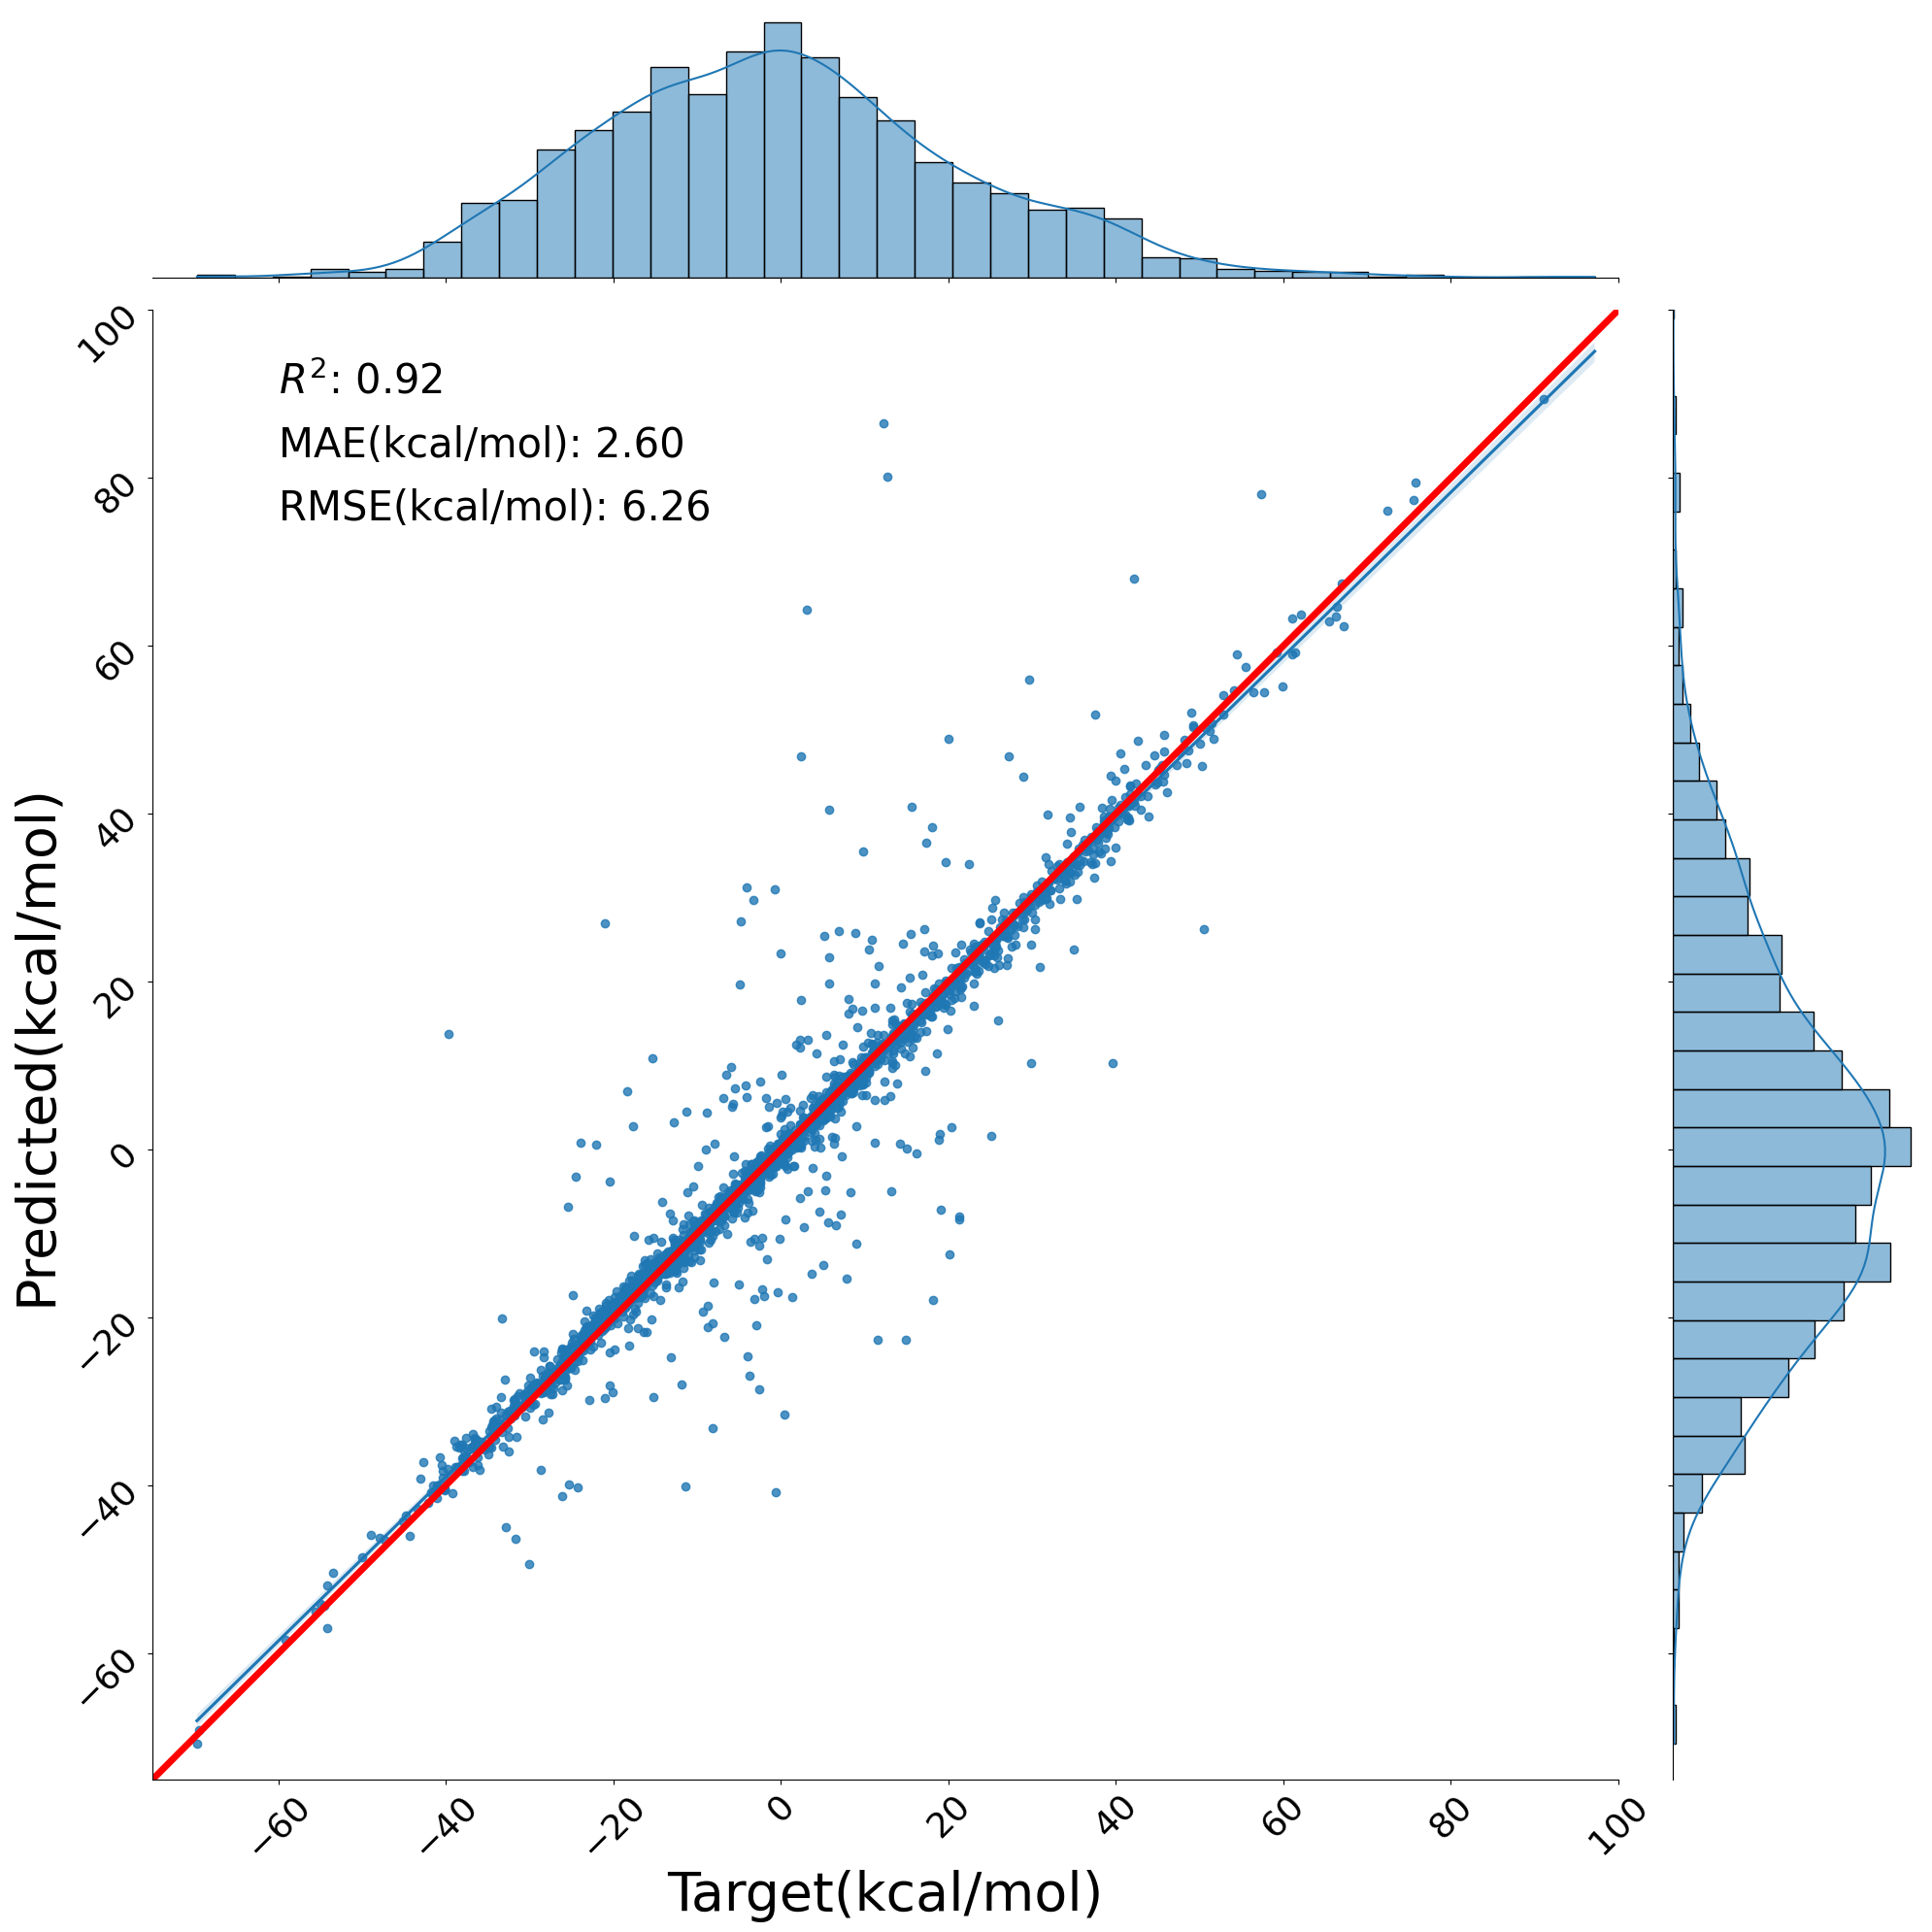

In [31]:
sns.jointplot(
    x="preds",
    y="labels",
    data=df_plot,
    kind="reg",
    height=20,
    space=0,
    ylim=(-75, 100),
    xlim=(-75, 100),
    # joint_kws={"line_kws": {"color": "red"}},
    # joint_kws={"gridsize": 80},
)
plt.xlabel("Target(kcal/mol)", fontsize=40)
plt.ylabel("Predicted(kcal/mol)", fontsize=40)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.plot([-75, 100], [-75, 100], linewidth=5, color="red")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.text(
    -60,
    90,
    "$R^2$: {:.2f}".format(r2),
    fontsize=30,
)

plt.text(
    -60,
    82.5,
    "MAE(kcal/mol): {:.2f}".format(mae),
    fontsize=30,
)


plt.text(
    -60,
    75,
    "RMSE(kcal/mol): {:.2f}".format(rmse),
    fontsize=30,
)

#plt.show()
plt.tight_layout()

save_string = os.path.join(
    "./test_performance_{}_{}.png".format("green", "qtaim")
)
plt.savefig(save_string, dpi=300)
